In [67]:
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# II. Analysis
## Data Exploration

In [68]:
pisa = pd.read_csv('pisa2009.csv')
print('Shape of training set: ',pisa.shape)

('Shape of training set: ', (5233, 24))


In [69]:
pisa.dtypes

grade                      int64
male                       int64
raceeth                   object
preschool                float64
expectBachelors          float64
motherHS                 float64
motherBachelors          float64
motherWork               float64
fatherHS                 float64
fatherBachelors          float64
fatherWork               float64
selfBornUS               float64
motherBornUS             float64
fatherBornUS             float64
englishAtHome            float64
computerForSchoolwork    float64
read30MinsADay           float64
minutesPerWeekEnglish    float64
studentsInEnglish        float64
schoolHasLibrary         float64
publicSchool               int64
urban                      int64
schoolSize               float64
readingScore             float64
dtype: object

### Preview of data

In [70]:
pisa.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


### Missing Values

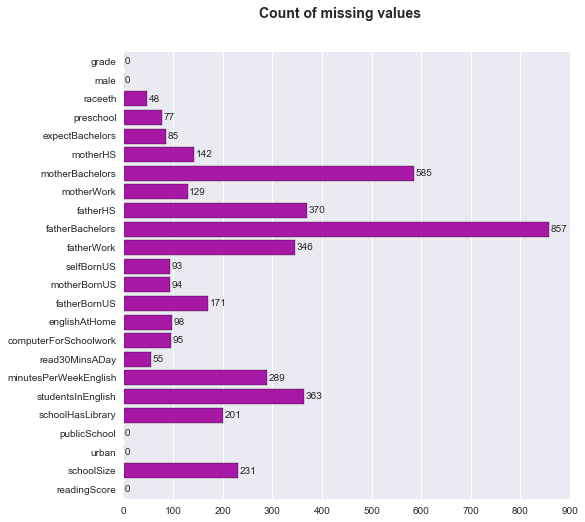

In [71]:
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Count of missing values', fontsize=14, fontweight='bold')
null_data = pisa.isnull().sum()
ax = sns.barplot(x = null_data.values, y=null_data.index, color="m" )
i = 0
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3, p.get_y() + 0.5, null_data.values[i])
    i += 1

In [72]:
# Continuous Features
contFeatures = ['minutesPerWeekEnglish','studentsInEnglish','schoolSize']
binaryFeatures = ['male',  'preschool', 'expectBachelors',
       'motherHS', 'motherBachelors', 'motherWork', 'fatherHS',
       'fatherBachelors', 'fatherWork', 'selfBornUS', 'motherBornUS',
       'fatherBornUS', 'englishAtHome', 'computerForSchoolwork',
       'read30MinsADay','schoolHasLibrary', 'publicSchool', 'urban' ]

In [73]:
pisa[contFeatures].describe()

,minutesPerWeekEnglish,studentsInEnglish,schoolSize
count,4944.000000,4870.000000,5002.000000
mean,265.717840,24.559754,1374.367653
std,149.591118,7.139661,870.424790
min,0.000000,1.000000,100.000000
25%,225.000000,20.000000,712.000000
50%,250.000000,25.000000,1233.000000
75%,300.000000,30.000000,1900.000000
max,2400.000000,90.000000,6694.000000


### Bivariate plots on continuous predictors

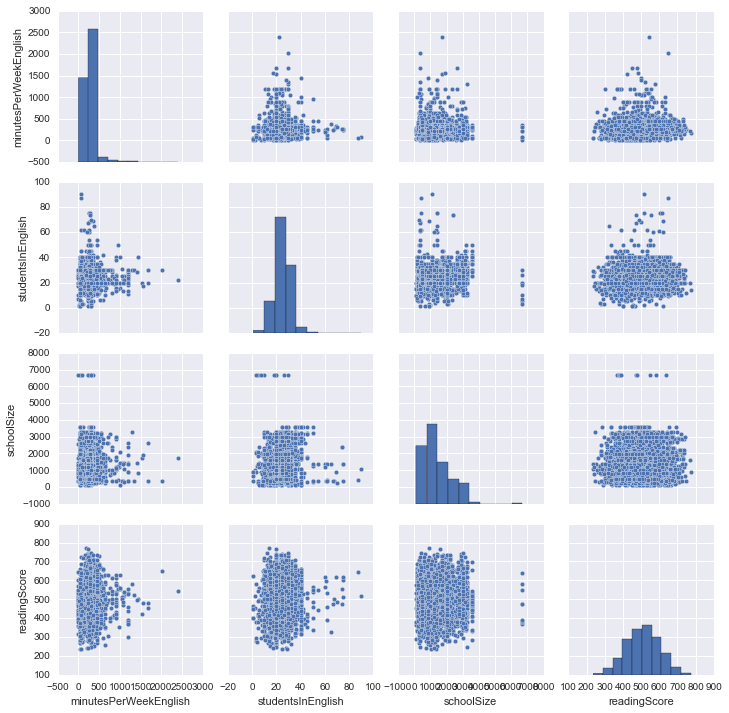

In [74]:
_ = sns.pairplot(pisa[contFeatures + ['readingScore']].dropna())

In [75]:
from IPython.display import display
tempdf = pisa.copy()

raceeth = pd.get_dummies(tempdf['raceeth'], 'r')
tempdf = pd.concat([tempdf, raceeth], axis=1)
tempdf = tempdf.drop('raceeth', axis=1)

#move the prediction target towards the end
tempdf = tempdf.drop('readingScore', axis=1)
tempdf['readingScore'] = pisa['readingScore']

raceeth
corr = tempdf.corr(method='pearson')
with pd.option_context('display.max_columns', None):
    display(corr)

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,r_American Indian/Alaska Native,r_Asian,r_Black,r_Hispanic,r_More than one race,r_Native Hawaiian/Other Pacific Islander,r_White,readingScore
grade,1.000000,-0.089213,-0.011200,0.148041,0.028976,0.043972,0.042522,0.068751,0.056805,0.010012,-0.015076,-0.062865,-0.057618,-0.009583,0.105568,0.065484,0.045747,0.074487,-0.016703,-0.059306,0.080561,0.063289,-0.023408,0.084707,-0.033769,-0.013163,-0.005996,0.029203,0.004317,0.272413
male,-0.089213,1.000000,0.005507,-0.088671,0.031166,0.048206,-0.016717,0.016752,0.057838,0.030472,0.013215,0.002977,0.012652,-0.005748,-0.028993,-0.214101,0.009808,-0.036348,0.022453,-0.075265,0.016113,-0.004586,0.022623,-0.023206,-0.010602,0.015579,-0.008216,0.019584,-0.000760,-0.145303
preschool,-0.011200,0.005507,1.000000,0.095978,0.140893,0.154680,0.069062,0.137600,0.146597,0.054756,0.093149,0.110534,0.113289,0.122812,0.094145,-0.003884,-0.012829,-0.030150,0.029039,-0.076767,-0.056366,-0.024381,-0.002954,-0.001570,0.039726,-0.120714,0.000731,-0.001656,0.077568,0.060373
expectBachelors,0.148041,-0.088671,0.095978,1.000000,0.109735,0.174178,0.070219,0.151738,0.208115,0.023476,-0.002508,0.009766,0.009201,0.035530,0.132233,0.125497,0.008403,0.041987,0.055405,-0.113289,0.006144,0.021538,-0.032191,0.062091,-0.008816,-0.088334,-0.000554,0.003074,0.064732,0.359425
motherHS,0.028976,0.031166,0.140893,0.109735,1.000000,0.252665,0.170211,0.509090,0.229883,0.036855,0.176047,0.344936,0.337395,0.376071,0.182245,0.020236,0.031403,-0.042705,0.021296,-0.074333,-0.116650,-0.089987,-0.004978,-0.044241,0.062062,-0.348739,0.024971,0.006369,0.260682,0.161376
motherBachelors,0.043972,0.048206,0.154680,0.174178,0.252665,1.000000,0.133704,0.210307,0.539321,0.067062,0.028062,0.140357,0.119619,0.160095,0.144212,0.033012,0.017249,-0.043409,0.022864,-0.172575,-0.040708,-0.007501,-0.023187,0.010866,-0.000595,-0.206743,0.007320,-0.006831,0.173525,0.213743
motherWork,0.042522,-0.016717,0.069062,0.070219,0.170211,0.133704,1.000000,0.115492,0.046268,0.054015,0.067138,0.102452,0.094600,0.121524,0.091743,-0.027740,0.022426,-0.011111,-0.007515,-0.025414,-0.027873,-0.047528,-0.021544,-0.025607,0.041216,-0.102118,0.013330,-0.005968,0.071580,0.047248
fatherHS,0.068751,0.016752,0.137600,0.151738,0.509090,0.210307,0.115492,1.000000,0.281755,0.107036,0.150403,0.298765,0.320266,0.336876,0.170892,0.046933,0.036223,-0.020973,0.036179,-0.086946,-0.100400,-0.083902,-0.018314,0.017634,0.044931,-0.339347,0.019806,0.017167,0.241250,0.188446
fatherBachelors,0.056805,0.057838,0.146597,0.208115,0.229883,0.539321,0.046268,0.281755,1.000000,0.108559,-0.008772,0.068955,0.072586,0.125238,0.172355,0.057101,0.008416,-0.031457,0.006428,-0.188413,-0.007594,0.031286,-0.044834,0.072559,-0.062323,-0.202203,-0.012158,-0.011727,0.192768,0.260840
fatherWork,0.010012,0.030472,0.054756,0.023476,0.036855,0.067062,0.054015,0.107036,0.108559,1.000000,-0.024228,-0.004170,-0.007727,0.013639,0.083243,-0.012241,0.023599,0.003508,-0.003134,-0.020203,-0.029030,-0.022164,-0.042797,-0.010644,-0.095892,-0.020836,-0.014122,-0.033243,0.102633,0.067909


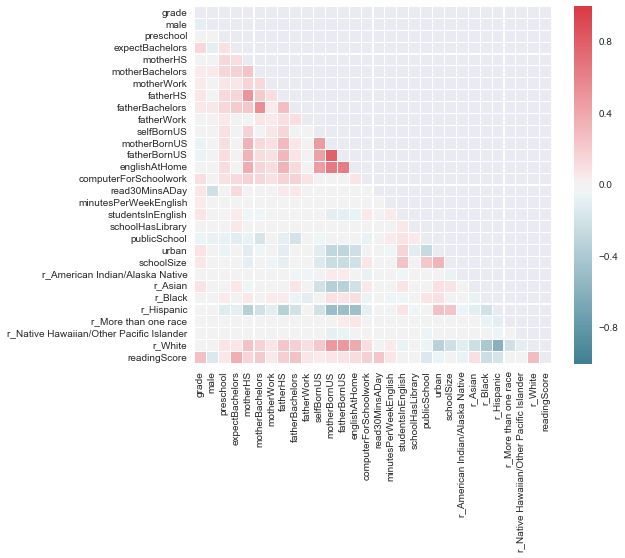

In [76]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
#
# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,vmax=1,
            square=True,linewidths=.1, cbar_kws={"shrink": .8}, ax=ax)
plt.show()

In [77]:
cor_dict = corr['readingScore'].to_dict()
del cor_dict['readingScore']
print("List the numerical features decendingly by their correlation with Reading Score:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("%21s: %.3f" %(ele))

List the numerical features decendingly by their correlation with Reading Score:

      expectBachelors: 0.359
              r_White: 0.291
                grade: 0.272
      fatherBachelors: 0.261
       read30MinsADay: 0.241
              r_Black: -0.225
      motherBachelors: 0.214
computerForSchoolwork: 0.190
             fatherHS: 0.188
           r_Hispanic: -0.185
             motherHS: 0.161
                 male: -0.145
         publicSchool: -0.141
        englishAtHome: 0.121
              r_Asian: 0.096
         fatherBornUS: 0.085
r_American Indian/Alaska Native: -0.070
minutesPerWeekEnglish: 0.068
           fatherWork: 0.068
         motherBornUS: 0.066
                urban: -0.062
            preschool: 0.060
           motherWork: 0.047
           selfBornUS: 0.039
           schoolSize: 0.035
    studentsInEnglish: 0.033
     schoolHasLibrary: 0.020
r_Native Hawaiian/Other Pacific Islander: 0.014
 r_More than one race: -0.000


In [78]:
pisa.shape[0] - pisa.dropna().shape[0]

1829

In [79]:
3404/float(pisa.shape[0])

0.6504872921842155

In [80]:
pisa['grade'].value_counts()

10    3619
11    1040
9      565
12       5
8        4
Name: grade, dtype: int64

In [81]:

print(pisa.shape)


(5233, 24)


### Benchmark

In [82]:
# Use average of scores as benchmark
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = LinearRegression()

withoutNa = pisa.dropna()
X = withoutNa.drop(['readingScore', 'raceeth'], axis=1)
y = withoutNa['readingScore']

kfold = KFold(n_splits=10, random_state=7)
cv_rmse = np.sqrt(-cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error'))
cv_r2 = cross_val_score(model, X, y, cv=kfold, scoring='r2')

print cv_rmse.mean()
print cv_r2.mean()


print(pisa.shape)


77.3750215458
0.241581166205
(5233, 24)


In [83]:
y = pisa['readingScore']

## III. Methodology

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

### Preprocess

In [84]:

seed = 7
y = pisa['readingScore']
pisa = pisa.drop('readingScore', axis=1)

# Missing values
# For continuous variables replace the missing data with average of columns
pisa['minutesPerWeekEnglish'].fillna(int(pisa['minutesPerWeekEnglish'].mean()), inplace=True)
pisa['studentsInEnglish'].fillna(int(pisa['studentsInEnglish'].mean()), inplace=True)
pisa['schoolSize'].fillna(int(pisa['schoolSize'].mean()), inplace=True)

# For 'raceeth' use 'missing' replacement
pisa['raceeth'].fillna('NoRace', inplace=True)
# For binary variable use 0.5 in place of missing value

pisa = pisa.apply(lambda x:x.fillna(0.5))

# Encode categorical data
raceeth = pd.get_dummies(pisa['raceeth'], 'raceeth')
pisa = pd.concat([pisa, raceeth], axis=1)
pisa = pisa.drop('raceeth', axis=1)

# remove multicolinearity
pisa = pisa.drop(['motherBachelors','motherBornUS', 'fatherBornUS'], axis=1)

# reduce skewness
pisa['schoolSize'] = np.log1p(pisa['schoolSize'])
pisa['minutesPerWeekEnglish'] = np.sqrt(pisa['minutesPerWeekEnglish'])

X = pisa.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## DecisionTreeRegressor

In [87]:

model  = DecisionTreeRegressor()
kfold = KFold(n_splits=10, random_state=7)
cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
cv_r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

print cv_rmse.mean()
print cv_r2.mean()

109.644179277
-0.31023144081


In [92]:
model  = DecisionTreeRegressor(max_depth=5)
kfold = KFold(n_splits=10, random_state=7)
cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
cv_r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

print cv_rmse.mean()
print cv_r2.mean()

80.8195907513
0.285314472223


### GradientBoostingRegressor

In [94]:

model  = GradientBoostingRegressor()
kfold = KFold(n_splits=10, random_state=7)
cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
cv_r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

print cv_rmse.mean()
print cv_r2.mean()

74.3183933076
0.395739410382


In [95]:
# Tuning max_depth



max_depth = range(1, 11)
param_grid = dict(max_depth=max_depth)

model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=10, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=kfold)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.396017 using {'max_depth': 4}
0.349970 (0.024748) with: {'max_depth': 1}
0.383327 (0.031691) with: {'max_depth': 2}
0.395765 (0.037526) with: {'max_depth': 3}
0.396017 (0.041396) with: {'max_depth': 4}
0.388091 (0.046765) with: {'max_depth': 5}
0.380105 (0.049527) with: {'max_depth': 6}
0.358086 (0.047189) with: {'max_depth': 7}
0.337076 (0.055672) with: {'max_depth': 8}
0.304644 (0.058014) with: {'max_depth': 9}
0.270615 (0.068222) with: {'max_depth': 10}


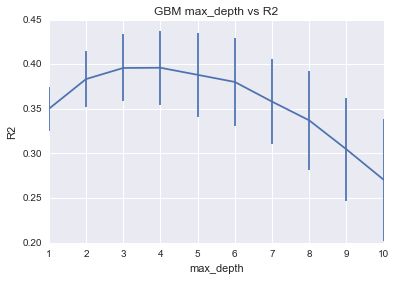

In [96]:
plt.errorbar(max_depth, means, yerr=stds)
plt.title("GBM max_depth vs R2")
plt.xlabel('max_depth')
plt.ylabel('R2')

In [97]:
model  = GradientBoostingRegressor(max_depth=4)
kfold = KFold(n_splits=10, random_state=7)
cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
cv_r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

print cv_rmse.mean()
print cv_r2.mean()

74.2930593484
0.395750227926


In [98]:
max_depth = 4
n_estimators = range(50, 600, 50)
param_grid = dict(n_estimators=n_estimators)

model = GradientBoostingRegressor(max_depth= max_depth, random_state=seed)
kfold = KFold(n_splits=10, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=kfold)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.396921 using {'n_estimators': 150}
0.383052 (0.034075) with: {'n_estimators': 50}
0.396017 (0.041396) with: {'n_estimators': 100}
0.396921 (0.041468) with: {'n_estimators': 150}
0.393817 (0.042694) with: {'n_estimators': 200}
0.390057 (0.044353) with: {'n_estimators': 250}
0.385017 (0.045825) with: {'n_estimators': 300}
0.380067 (0.046964) with: {'n_estimators': 350}
0.376091 (0.047082) with: {'n_estimators': 400}
0.371570 (0.048677) with: {'n_estimators': 450}
0.368136 (0.049283) with: {'n_estimators': 500}
0.363027 (0.049873) with: {'n_estimators': 550}


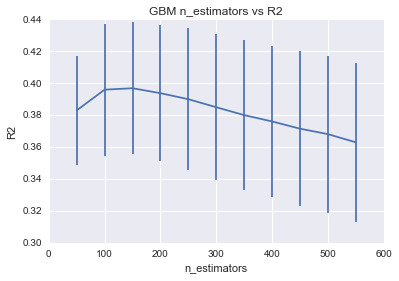

In [99]:
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("GBM n_estimators vs R2")
plt.xlabel('n_estimators')
plt.ylabel('R2')

In [100]:
max_depth = 4
n_estimators = 150
loss =['ls', 'lad','huber','quantile']

param_grid = dict(loss=loss)

model = GradientBoostingRegressor(max_depth= max_depth, random_state=seed)
kfold = KFold(n_splits=10, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=kfold)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.396082 using {'loss': 'lad'}
0.396017 (0.041396) with: {'loss': 'ls'}
0.396082 (0.036393) with: {'loss': 'lad'}
0.395256 (0.037655) with: {'loss': 'huber'}
-0.591278 (0.114821) with: {'loss': 'quantile'}
